In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("./telecom_churn_data.csv")

# Drop CustomerID (not needed for prediction)
df.drop(columns=["CustomerID"], inplace=True)

# Convert categorical variables into numerical using Label Encoding
label_encoders = {}
categorical_columns = ["Contract", "InternetService"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # Store encoders for future use

# Split dataset into features (X) and target variable (y)
X = df.drop(columns=["Churn"]) # Features
y = df["Churn"] # Target variable

# Scale numerical features for better performance
scaler = StandardScaler()
X[["Tenure", "MonthlyCharges", "TotalCharges", "SupportTickets"]] = scaler.fit_transform(
X[["Tenure", "MonthlyCharges", "TotalCharges", "SupportTickets"]]
)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
# Try increasing weight for churn (class 1)
model = LogisticRegression(class_weight={0: 1, 1: 3})
model.fit(X_train, y_train)


# Predict on test data
y_pred = model.predict(X_test)

# Create a DataFrame to display features and predictions
predictions_df = X_test.copy()  # Copy test features
predictions_df["Predicted Churn"] = y_pred  # Add predictions as a new column

# Show the first 10 rows
print(predictions_df.head(10))

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

 #Classification Report (without macro and weighted averages)
report = classification_report(y_test, y_pred, target_names=["No Churn", "Churn"], output_dict=True)
print("\nClassification Report:")
for label, metrics in report.items():
    if label in ["No Churn", "Churn"]:
        print(f"{label}:")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall: {metrics['recall']:.2f}")
        print(f"  F1-Score: {metrics['f1-score']:.2f}")
        print(f"  Support: {int(metrics['support'])}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

        Tenure  MonthlyCharges  TotalCharges  Contract  InternetService  \
1501  0.646953        0.658996      1.435372         0                1   
2586  1.286566       -0.680583      0.080372         2                0   
2653  0.253346        0.699894      1.172783         0                2   
1055 -0.533870        0.001511      0.344430         2                0   
705  -0.927477        1.176805     -1.665272         2                1   
106  -1.025879       -0.493770     -1.196897         2                1   
589  -1.616291        0.026465     -1.262840         0                1   
2468 -0.829076       -1.544291     -0.208873         0                1   
2413 -0.386267        0.710985     -1.257539         1                2   
1600  0.154944        0.365779     -0.969026         1                1   

      SupportTickets  Predicted Churn  
1501        0.486185                0  
2586       -1.264949                1  
2653       -1.615175                0  
1055       -0.

Matplotlib is building the font cache; this may take a moment.


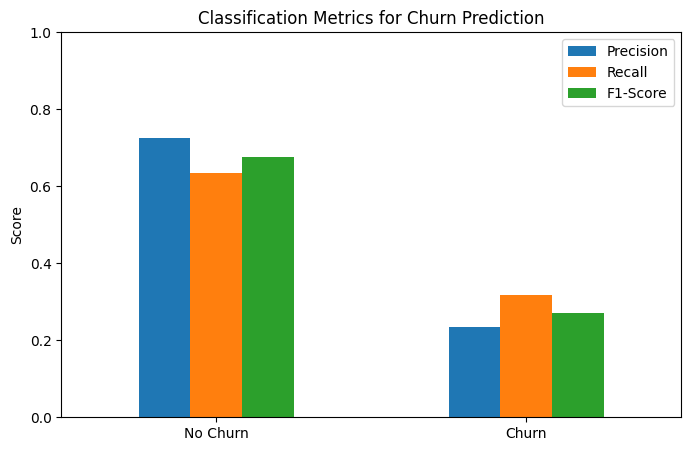

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract precision, recall, and f1-score for each class
metrics_df = pd.DataFrame(report).T.iloc[:2, :-1]  # Select only "No Churn" and "Churn" rows, exclude "support"

# Plot bar chart
metrics_df.plot(kind="bar", figsize=(8, 5))
plt.title("Classification Metrics for Churn Prediction")
plt.ylabel("Score")
plt.xticks(rotation=0)  # Keep labels horizontal for better readability
plt.legend(["Precision", "Recall", "F1-Score"])
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1
plt.show()


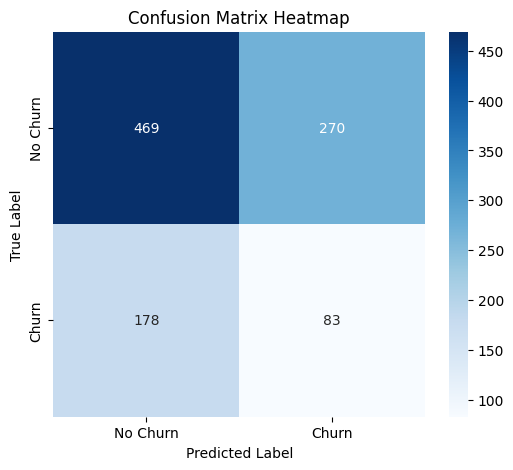

In [6]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
